In [1]:
import rasterio
import os
import numpy as np
%matplotlib inline
import pandas as pd

In [2]:
from glob import glob

data_dir = 'data' # Or sys.argv[1]
file_list = glob(os.path.join(data_dir, '*.tif'))

def read_file(file):
    with rasterio.open(file) as src:
        return(src.read(1))

# Read all data as a list of numpy arrays 
array_list = [read_file(x) for x in file_list]


In [3]:
array_list_flatten = [x.flatten() for x in array_list]

In [4]:
len(array_list_flatten)

22

In [5]:
array_list_flatten[0]

array([-26.95575 , -26.95575 , -26.95575 , ..., -28.016582, -28.016582,
       -28.016582], dtype=float32)

In [6]:
pdf = pd.DataFrame()

for f in file_list:
    pdf[f] = read_file(f).flatten()

In [ ]:
pdf

In [9]:
pdf_percent = pdf.sample(frac=0.03)

In [10]:
from sklearn.preprocessing import scale
pdf_data = scale(pdf_percent)

/Users/venvs/myenv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


/Users/venvs/myenv/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Magnitude')

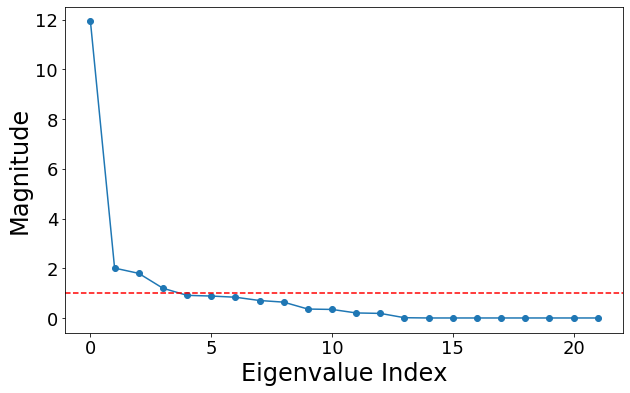

In [11]:
# Visualization libraries
import matplotlib.pylab as plt
#import seaborn as sns

fig = plt.figure(figsize=(10,6))
covar_matrix = np.cov(pdf_data, rowvar=False)
eigenvalues = np.linalg.eig(covar_matrix)[0]
plt.plot(eigenvalues, 'o-')
plt.axhline(y=1.0, color='r', linestyle='--')
plt.tick_params(labelsize=18)
plt.xlabel('Eigenvalue Index', fontsize=24)
plt.ylabel('Magnitude', fontsize=24)

In [12]:
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans

fa_model = FactorAnalysis(n_components = 6)
fa_model.fit(pdf_data)
factor_data = fa_model.transform(pdf_data)

In [13]:
factor_data

array([[-0.08109929,  0.37462544,  1.06676226,  0.15434481, -0.2163002 ,
         0.59430507],
       [-0.08109929, -0.30031245,  0.72005228, -0.44402364,  0.3082984 ,
         0.14600628],
       [-0.08109929, -1.31364636,  0.93192609, -0.55369365,  0.87549797,
        -1.02125042],
       ...,
       [-0.08109929, -0.49647149, -0.77239534, -0.92092678,  0.75921473,
        -0.00179993],
       [-0.08109929, -0.58036607,  0.81179311, -0.65325301, -0.08847284,
        -0.045894  ],
       [-0.08109929,  0.4772733 ,  0.26758271,  0.60909461, -0.22268791,
         1.28430774]])

In [14]:
# create a dataframe consisting of the factor values for each data point
factor_df = pd.DataFrame(factor_data, columns=['Comp {}'.format(i) for i in range(0,6)])

In [15]:
factor_df

,Comp 0,Comp 1,Comp 2,Comp 3,Comp 4,Comp 5
0,-0.081099,0.374625,1.066762,0.154345,-0.216300,0.594305
1,-0.081099,-0.300312,0.720052,-0.444024,0.308298,0.146006
2,-0.081099,-1.313646,0.931926,-0.553694,0.875498,-1.021250
3,-0.081099,0.239468,1.192611,-0.530462,0.172191,0.473437
4,-0.081099,-0.304534,-0.191152,0.167463,0.114411,0.095658
5,-0.081099,-0.246516,1.451029,-1.016927,0.592567,-1.368665
6,-0.081099,0.076485,-0.063121,-0.751695,-0.285268,0.066060
7,-0.081099,-0.787005,-0.586182,0.070656,0.293874,0.282824
8,-0.081099,-0.040049,-0.864399,-0.709039,-1.119027,0.114561
9,-0.081099,-0.153975,0.923713,-1.270595,0.054575,0.150867


In [16]:
# create a dataframe with the factor loadings associated with each observation
loading = fa_model.components_
component_names = pdf.columns.values[:]
loading_df =  pd.DataFrame(loading,
                           columns=component_names)

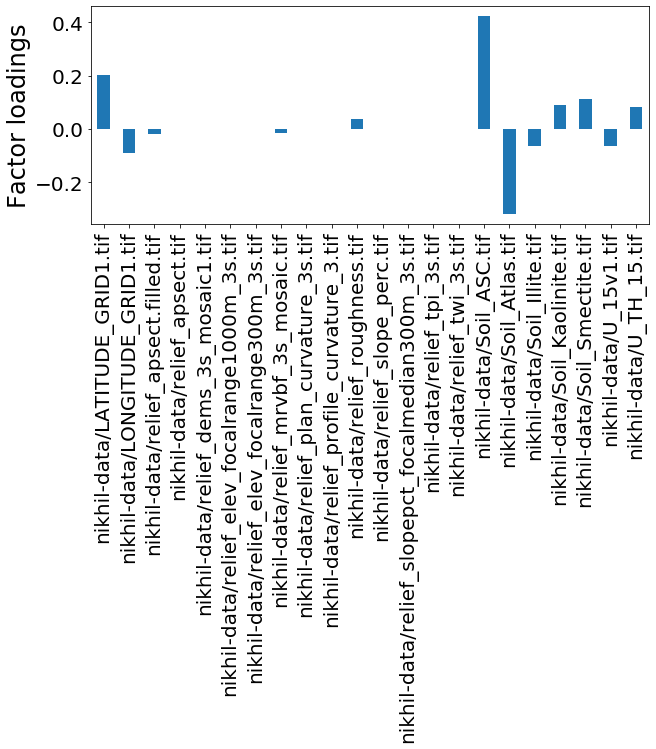

In [17]:
for factor_id in range(0, loading_df.shape[0]):

    # just plot the fourth factor, remove the loop to plot all
    if factor_id == 4:
        fig = plt.figure(figsize=(10,4))
        #plt.title('Factor {}'.format(factor_id))
        plt.ylabel('Factor loadings', fontsize=24)
        loading_df.ix[factor_id].plot(kind='bar')
        plt.tick_params(labelsize=20)
        # fig.savefig('images/Figure_2_Factor_interp.png', dpi=300, bbox_inches='tight')
        # fig.savefig('images/Figure_2_Factor_interp.tif', dpi=300, bbox_inches='tight')
        break
    else:
        continue

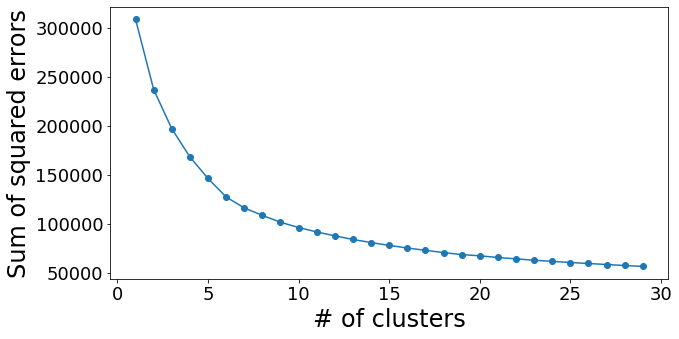

In [18]:
inertias = []
means = []
maxK = 30
for k in range(1, maxK):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(factor_data)
    means.append(k)
    inertias.append(kmeans.inertia_)

fig = plt.figure(figsize=(10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('# of clusters', fontsize=24)
plt.ylabel('Sum of squared errors', fontsize=24)
plt.tick_params(labelsize=18)
# fig.savefig('images/Figure_3_k_means.tif', dpi=300, bbox_inches='tight')
# fig.savefig('images/Figure_3_k_means.png', dpi=300, bbox_inches='tight')

In [19]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(factor_data)

# add the cluster ids to the dataset
factor_df['Cluster'] = kmeans.labels_ + 1
pdf_percent['Cluster'] = kmeans.labels_

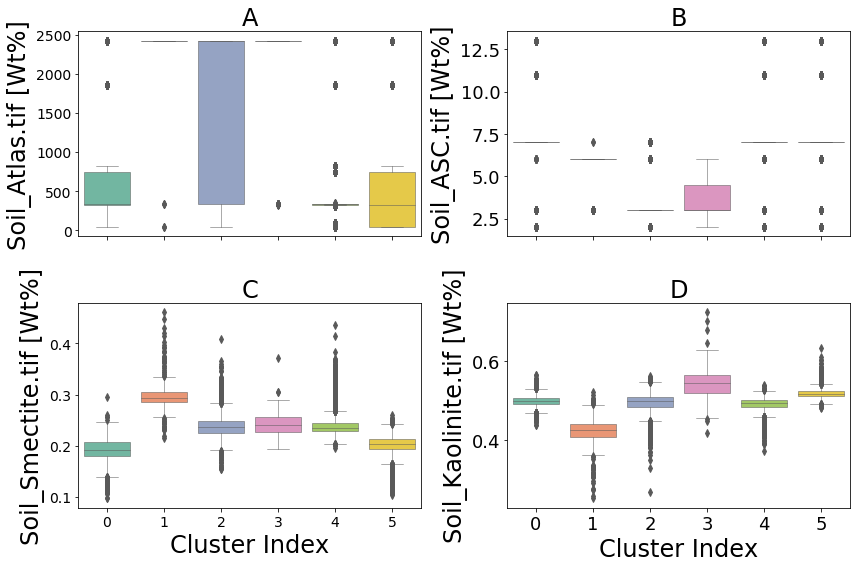

In [21]:
import seaborn as sns
facies_colors = sns.color_palette("Set2", 6)

fig, ax = plt.subplots(2,2, figsize=(12,8), sharex=True)
b= sns.boxplot(x='Cluster', y='data/Soil_Atlas.tif', linewidth=0.5,
            data=pdf_percent, ax=ax[0,0],
            palette=facies_colors)
b.set_title("A",fontsize=24)
b.set_xlabel("")
b.set_ylabel("Soil_Atlas.tif [Wt%]",fontsize=24)
b.tick_params(labelsize=14)

b= sns.boxplot(x='Cluster', y='data/Soil_ASC.tif', linewidth=0.5,
            data=pdf_percent, ax=ax[0,1],
            palette=facies_colors)
b.set_title("B",fontsize=24)
b.set_xlabel("")
b.set_ylabel("Soil_ASC.tif [Wt%]",fontsize=24)
b.tick_params(labelsize=18)

b=sns.boxplot(x='Cluster', y='data/Soil_Smectite.tif', linewidth=0.5,
            data=pdf_percent, ax=ax[1,0],
            palette=facies_colors)
b.set_title("C",fontsize=24)
b.set_xlabel("Cluster Index",fontsize=24)
b.set_ylabel("Soil_Smectite.tif [Wt%]",fontsize=24)
b.tick_params(labelsize=14)

b=sns.boxplot(x='Cluster', y='data/Soil_Kaolinite.tif', linewidth=0.5,
            data=pdf_percent, ax=ax[1,1],
            palette=facies_colors)
b.set_title("D",fontsize=24)
b.set_xlabel("Cluster Index",fontsize=24)
b.set_ylabel("Soil_Kaolinite.tif [Wt%]",fontsize=24)
b.tick_params(labelsize=18)

plt.tight_layout()

In [29]:

import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_facies_log_plot(logs, facies_colors, label):
    # reset to original matplotlib style
    # seaborn doesn't look as good for this
    import matplotlib as mpl
    mpl.rcParams.update(mpl.rcParamsDefault)
    
    #make sure logs are sorted by longitude 
    logs = logs.sort_values(by='data/LONGITUDE_GRID1.tif')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs['data/LONGITUDE_GRID1.tif'].min(); zbot=logs['data/LONGITUDE_GRID1.tif'].max()
    
    cluster=np.repeat(np.expand_dims(logs[label].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(8, 10))
    ax[0].plot(logs['data/Soil_Atlas.tif'], logs['data/LONGITUDE_GRID1.tif'], '-g')
    ax[1].plot(logs['data/Soil_ASC.tif'], logs['data/LONGITUDE_GRID1.tif'], '-')
    ax[2].plot(logs['data/Soil_Smectite.tif'], logs['data/LONGITUDE_GRID1.tif'], '-', color='0.5')
    ax[3].plot(logs['data/Soil_Kaolinite.tif'], logs['data/LONGITUDE_GRID1.tif'], '-', color='r')
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=6)
    
    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((10*' ').join(['Clust 1', 'Clust 2', 'Clust 3', 
                                'Clust 4', 'Clust 5', 'Clust 6']), fontsize=14)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel('Soil_Atlas.tif', fontsize=16)
    ax[0].set_xlim(logs['data/Soil_Atlas.tif'].min(),logs['data/Soil_Atlas.tif'].max())
    ax[0].set_ylabel('MD [m]', fontsize=24)
    ax[0].tick_params(labelsize=12)
    ax[0].grid(b=False)
    ax[1].set_xlabel("Soil_ASC.tif", fontsize=16)
    ax[1].set_xlim(logs['data/Soil_ASC.tif'].min(),logs['data/Soil_ASC.tif'].max())
    ax[1].grid(b=False)
    ax[1].tick_params(labelsize=12)
    ax[2].set_xlabel("Soil_Smectite.tif", fontsize=16)
    ax[2].set_xlim(logs['data/Soil_Smectite.tif'].min(),logs['data/Soil_Smectite.tif'].max())
    ax[2].grid(b=False)
    ax[2].tick_params(labelsize=12)
    ax[3].set_xlabel("Soil_Kaolinite.tif", fontsize=16)
    ax[3].set_xlim(logs['data/Soil_Kaolinite.tif'].min(),logs['data/Soil_Kaolinite.tif'].max())
    ax[3].grid(b=False)
    ax[3].tick_params(labelsize=12)
    ax[4].set_xlabel('Facies', fontsize=16)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]);
    ax[4].set_xticklabels([])
    
    #f.suptitle(logs.iloc[0]['Well Name'], fontsize=14,y=0.9)
    return f

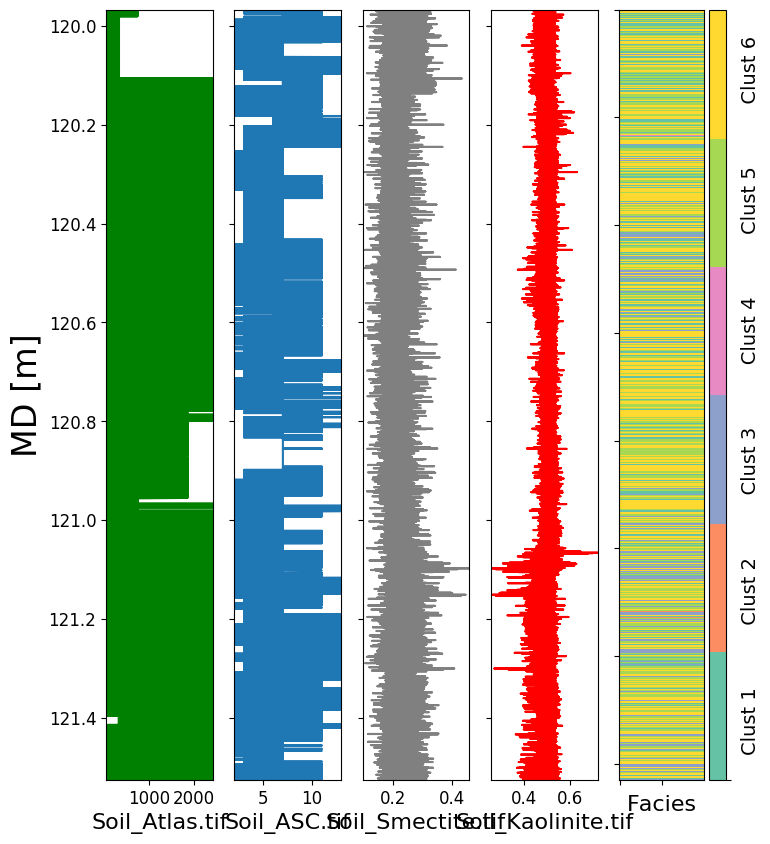

In [30]:
f = make_facies_log_plot(pdf_percent,
        facies_colors, 'Cluster')